***

# `GPT-2 Questioner`
Evaluate the GPT-2-based visual questioner.

***

In [1]:
import os
import yaml
import imageio
import gpt_2_simple as gpt2
from captioner import Captioner
import matplotlib.pyplot as plt
from postprocess_utils import gpt2_gen_questions
from postprocess_utils import postprocess_caption

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

%matplotlib inline

In [2]:
# Only run once
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess)

Loading checkpoint checkpoint/run1/model-500


In [3]:
# Prepare captioner
config = yaml.load(open('config.yaml', 'r'), Loader=yaml.FullLoader)
checkpoint_path = os.path.join(config['project_root_dir'], config['checkpoint_path'])
vocab_file_path = os.path.join(config['project_root_dir'], config['vocab_file_path'])
captioner = Captioner(sess, checkpoint_path, vocab_file_path)

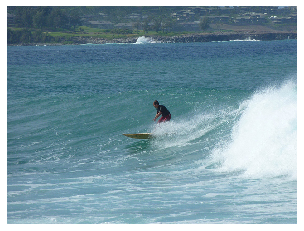

In [4]:
# Load image
image_path = '/home/owen/workspace/visual-questioner/images/water.jpg'
image = imageio.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
# Run captioner
caption = captioner.caption(image_path)
print(postprocess_caption(caption))

A man riding a wave on top of a surfboard.


In [6]:
# Run GPT-2 questioner
questions = gpt2_gen_questions(sess, caption, nsamples=1, temperature=0.7)
print('Questions:')
for i, question in enumerate(questions):
    print('%d. %s' % (i + 1, question))

Questions:
1. Who was the first person to make waves in the ocean?
